# Daten importieren

In [16]:
import pandas as pd

df = pd.read_csv("employees_punctuality.csv")
df

,Transportation,Weather Condition,Arrival on Time
0,Car,Rainy,True
1,Bus,Rainy,True
2,Bus,Snowy,False
3,Car,Sunny,False
4,Bus,Rainy,True
...,...,...,...
102,Bus,Snowy,False
103,Car,Rainy,True
104,Bicycle,Snowy,True
105,Bus,Rainy,True


# Daten aufteilen

In [17]:
X = df.copy()
y = X.pop("Arrival on Time")

In [18]:
X

,Transportation,Weather Condition
0,Car,Rainy
1,Bus,Rainy
2,Bus,Snowy
3,Car,Sunny
4,Bus,Rainy
...,...,...
102,Bus,Snowy
103,Car,Rainy
104,Bicycle,Snowy
105,Bus,Rainy


In [19]:
y

0       True
1       True
2      False
3      False
4       True
       ...  
102    False
103     True
104     True
105     True
106     True
Name: Arrival on Time, Length: 107, dtype: bool

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [21]:
y_train.value_counts() / len(y_train)

True     0.505882
False    0.494118
Name: Arrival on Time, dtype: float64

In [23]:
~y_train

13    False
31     True
51     True
34    False
62    False
      ...  
37     True
0     False
45    False
64     True
91    False
Name: Arrival on Time, Length: 85, dtype: bool

In [24]:
X_train_true = X_train[y_train]
X_train_false = X_train[~y_train]

In [25]:
X_train_true["Transportation"].value_counts() / len(X_train_true)

Car        0.372093
Bus        0.325581
Bicycle    0.302326
Name: Transportation, dtype: float64

In [26]:
X_train_true["Weather Condition"].value_counts() / len(X_train_true)

Rainy    0.395349
Sunny    0.372093
Snowy    0.232558
Name: Weather Condition, dtype: float64

In [27]:
X_train_false["Transportation"].value_counts() / len(X_train_false)

Bicycle    0.357143
Car        0.333333
Bus        0.309524
Name: Transportation, dtype: float64

In [28]:
X_train_false["Weather Condition"].value_counts() / len(X_train_false)

Snowy    0.428571
Sunny    0.309524
Rainy    0.261905
Name: Weather Condition, dtype: float64

# Kategorische Features transformieren

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
ordinal_encoder.fit(X_train)

X_train_encoded = pd.DataFrame(ordinal_encoder.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_encoded = pd.DataFrame(ordinal_encoder.transform(X_test), columns=X_test.columns, index=X_test.index)

In [30]:
X_train

,Transportation,Weather Condition
13,Bus,Snowy
31,Car,Rainy
51,Car,Sunny
34,Car,Sunny
62,Bicycle,Sunny
...,...,...
37,Bicycle,Snowy
0,Car,Rainy
45,Car,Sunny
64,Bicycle,Sunny


In [31]:
X_train_encoded

,Transportation,Weather Condition
13,1.0,1.0
31,2.0,0.0
51,2.0,2.0
34,2.0,2.0
62,0.0,2.0
...,...,...
37,0.0,1.0
0,2.0,0.0
45,2.0,2.0
64,0.0,2.0


# Categorical Naive Bayes - Modell trainieren


In [32]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB()
model.fit(X_train_encoded, y_train)

CategoricalNB()

# Finale Accuracy

In [33]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.6363636363636364


# Confusion Matrix

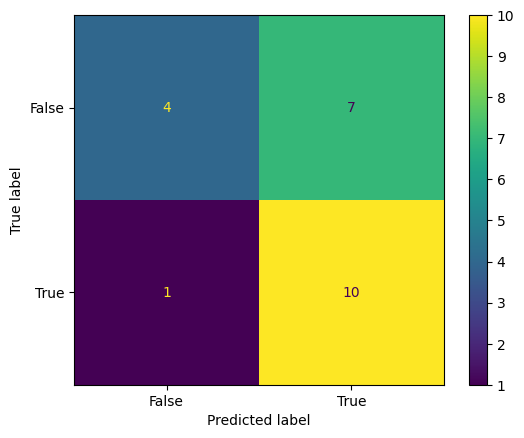

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)